In [28]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [29]:
key_dirs = ['chirp_f_0.26_to_0_a_6_to_6','he_1_2_12','he_3_15_12','sin_f_0.7_a_3_m_0']

In [34]:
def find_true_spearman(data):
    for line in data:
        if 'Ground Truth' in line:
            return float(re.findall(r'\d+.\d+', line)[0])
all_data = []        
for folder in key_dirs:
    files = [os.path.join(folder, f) for f in os.listdir(folder) if 'spearman.txt' in f]
    for f_name in files:
        with open(f_name,'r') as f:
            data = f.readlines()
        spearman = find_true_spearman(data)
        n_pcs = int(re.findall(r'\d+',f_name)[-1])
        all_data.append({'n_pcs': n_pcs, 'stim': folder, 'spearman': spearman})
        

In [35]:
df = pd.DataFrame.from_dict(all_data)
df = df.loc[~(df['n_pcs'] == 0)]
df.head(5)

,n_pcs,stim,spearman
1,68,chirp_f_0.26_to_0_a_6_to_6,0.66879
2,28,chirp_f_0.26_to_0_a_6_to_6,0.65210
3,70,chirp_f_0.26_to_0_a_6_to_6,0.66846
4,22,chirp_f_0.26_to_0_a_6_to_6,0.63455
5,6,chirp_f_0.26_to_0_a_6_to_6,0.58438


In [36]:
df['stim'].unique()
palette={'chirp_f_0.26_to_0_a_6_to_6': 'red', 'he_1_2_12':'blue', 'he_3_15_12':'seagreen',
       'he_1_2_12_whiten':'darkgreen', 'sin_f_0.7_a_3_m_0':'brown'}
topbars={'chirp_f_0.26_to_0_a_6_to_6': .687, 'he_1_2_12':.701,'he_3_15_12':.71,
       'he_1_2_12_whiten':.701, 'sin_f_0.7_a_3_m_0':0.67351}

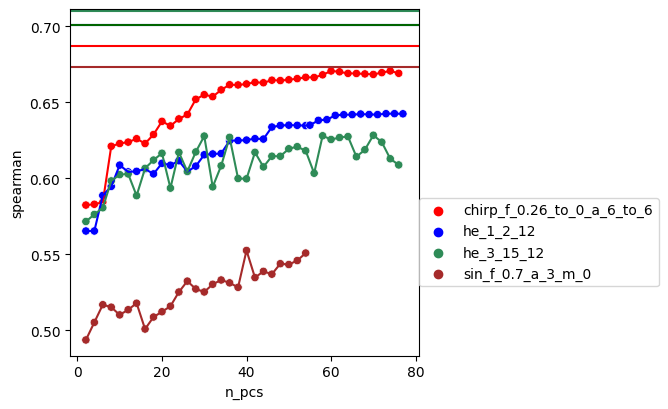

In [37]:
fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
sns.scatterplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax)
sns.lineplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax, legend=False)
for key in palette.keys():
    ax.axhline(topbars[key], color=palette[key])
plt.legend(loc=[1,.2])
plt.savefig('spearman_v_pc_noscaler.png', dpi=300, bbox_inches='tight', facecolor='white')

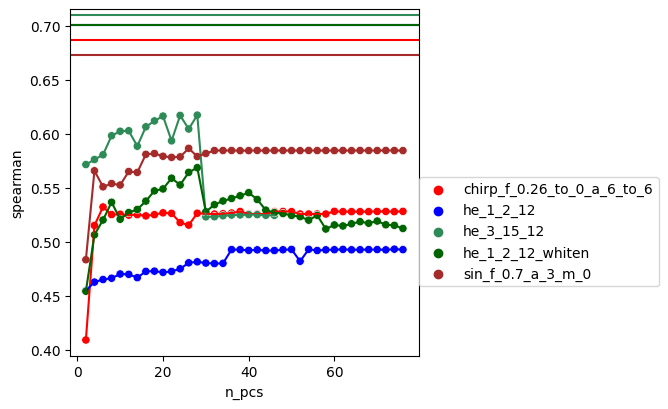

In [86]:
fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
sns.scatterplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax)
sns.lineplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax, legend=False)
for key in palette.keys():
    ax.axhline(topbars[key], color=palette[key])
plt.legend(loc=[1,.2])
plt.savefig('spearman_v_pc.png', dpi=300, bbox_inches='tight', facecolor='white')

In [39]:
key_dirs = ['multi_stim']

In [40]:
def find_true_spearman(data):
    for line in data:
        if 'Ground Truth' in line:
            return float(re.findall(r'\d+.\d+', line)[0])
all_data = []        
for folder in key_dirs:
    files = [os.path.join(folder, f) for f in os.listdir(folder) if 'spearman.txt' in f]
    for f_name in files:
        with open(f_name,'r') as f:
            data = f.readlines()
        spearman = find_true_spearman(data)
        n_pcs = int(re.findall(r'\d+',f_name)[-1])
        all_data.append({'n_pcs': n_pcs, 'stim': folder, 'spearman': spearman})
        

In [41]:
df = pd.DataFrame.from_dict(all_data)
df = df.loc[~(df['n_pcs'] == 0)]
df.head(5)

,n_pcs,stim,spearman
1,22,multi_stim,0.66333
2,6,multi_stim,0.63988
3,4,multi_stim,0.62247
4,20,multi_stim,0.66342
5,18,multi_stim,0.66289


In [42]:
df['stim'].unique()
palette = {'multi_stim': 'red'}
topbars = {'multi_stim': .71}

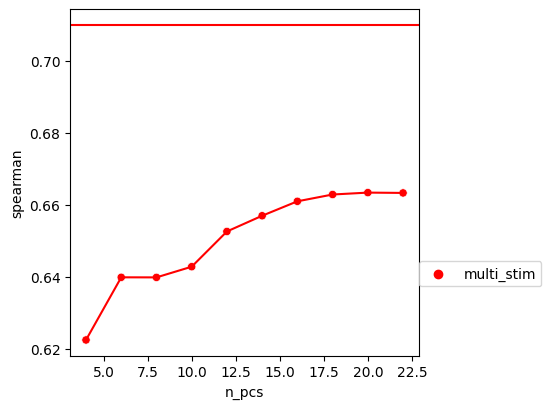

In [43]:
fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
sns.scatterplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax)
sns.lineplot(x='n_pcs', y='spearman', data=df, hue='stim',palette=palette, ax=ax, legend=False)
for key in palette.keys():
    ax.axhline(topbars[key], color=palette[key])
plt.legend(loc=[1,.2])
plt.savefig('spearman_v_pc_multi.png', dpi=300, bbox_inches='tight', facecolor='white')